# Descriptive analysis of civilians-shot data

Simply summarizes the data, sliced in myriad ways

### PRO TIP: Just skim for the graphs if you are only interested in the results

##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## Setup and read data

In [1]:
DTW_PROJECT_KEY = 'tji/auxiliary-datasets'
OIS_FILENAME = '../../data-processing/data/clean/shot_civilians.csv'
SAVE_PLOTS = True
PLOT_DIR= '../plots/'
PLOT_PREFIX = 'ois_civilians_'

In [2]:
from wordcloud import WordCloud
from lib import eda

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Jupyter setup
%matplotlib inline

## Graphical setup
# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
SNS_COLORS = sns.color_palette()
mpl.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a "Everett Wetchler" -d -t -z -w -p numpy,pandas,matplotlib,datadotworld

####################################################
# END Boilerplate
####################################################

Everett Wetchler 2018-05-09 20:07:40 CDT

numpy 1.14.3
pandas 0.20.1
matplotlib 2.2.0
datadotworld 1.6.0
watermark 1.5.0


In [4]:
# Helper function to (optionally) save and name plots)
plotcount = 0
def saveplot(fig, name):
    if SAVE_PLOTS:
        global plotcount
        plotcount += 1
        filename = os.path.join(PLOT_DIR, PLOT_PREFIX + "%02d_%s.png" % (plotcount, name))
        fig.savefig(filename)

if SAVE_PLOTS:
    prev_plots = [f for f in os.listdir(PLOT_DIR) if f.startswith(PLOT_PREFIX)]
    print("Removing %d past plots" % len(prev_plots))
    for f in prev_plots:
        os.remove(os.path.join(PLOT_DIR, f))

Removing 10 past plots


In [5]:
shootings = pd.read_csv(OIS_FILENAME)

for c in shootings.columns:
    if c.startswith('date'):
        shootings[c] = pd.to_datetime(shootings[c])

first_shooting = shootings.date_incident.min().strftime('%Y-%m-%d')
last_shooting = shootings.date_incident.max().strftime('%Y-%m-%d')
print("Civilians shot data from %s to %s" % (first_shooting, last_shooting))

shootings.head()

Civilians shot data from 2015-09-02 to 2018-04-16


,date_ag_received,date_incident,incident_address,incident_city,incident_county,incident_zip,incident_latitude,incident_longitude,incident_result_of,incident_call_other,civilian_name_first,civilian_name_last,civilian_gender,civilian_age,civilian_race,civilian_died,officer_age_1,officer_race_1,officer_gender_1,officer_on_duty_1,agency_name_1,agency_report_date_1,agency_city_1,agency_county_1,agency_zip_1,agency_name_person_filling_out_1,agency_email_person_filling_out_1,officer_age_2,officer_race_2,officer_gender_2,officer_caused_injury_2,agency_name_2,agency_report_date_2,agency_city_2,agency_county_2,agency_zip_2,agency_name_person_filling_out_2,agency_email_person_filling_out_2,officer_age_3,officer_race_3,officer_gender_3,officer_caused_injury_3,agency_name_3,agency_report_date_3,agency_city_3,agency_county_3,agency_zip_3,agency_name_person_filling_out_3,agency_email_person_filling_out_3,officer_age_4,...,agency_zip_7,agency_name_person_filling_out_7,agency_email_person_filling_out_7,officer_age_8,officer_race_8,officer_gender_8,agency_name_8,agency_report_date_8,agency_city_8,agency_county_8,agency_zip_8,agency_name_person_filling_out_8,agency_email_person_filling_out_8,officer_age_9,officer_race_9,officer_gender_9,agency_name_9,agency_report_date_9,agency_city_9,agency_county_9,agency_zip_9,agency_name_person_filling_out_9,agency_email_person_filling_out_9,officer_age_10,officer_race_10,officer_gender_10,agency_name_10,agency_report_date_10,agency_city_10,agency_county_10,agency_zip_10,agency_name_person_filling_out_10,agency_email_person_filling_out_10,news_coverage_1,news_coverage_2,news_coverage_3,news_coverage_4,cdr_narrative,custodial_death_report,deadly_weapon,deadly_weapon_category,deadly_weapon_description,extras,lea_narrative_published,lea_narrative_shorter,multiple_officers_involved,num_officers_recorded,num_reports_filed,on_duty,time_incident
0,NaT,2015-09-02,1010 MAGNOLIA STREET,FREEPORT,BRAZORIA,77541.0,28.944891,-95.356262,TRAFFIC STOP,NARCOTIC STOP AND EVADING ARREST,RICKEY,MAYBERRY,MALE,30.0,BLACK,False,27.0,HISPANIC,MALE,ON DUTY,FREEPORT POLICE DEPT,9/16/2015,FREEPORT,BRAZORIA,77541,PAMELA MORRIS,PMORRIS@FREEPORT.TX.US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABC 13,YOUR SOUTHEST TEXAS,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,True,1,1,True,NaN
1,NaT,2015-09-03,4840 E. PLANO PARKWAY,PLANO,COLLIN,75074.0,33.008128,-96.642308,OTHER - SPECIFY TYPE OF CALL,ACCIDENTAL DISCHARGE RICOCHET DURING RANGE ACT...,NaN,NaN,MALE,55.0,WHITE,False,30.0,HISPANIC,MALE,ON DUTY,PLANO POLICE DEPT,10/1/2015,PLANO,COLLIN,75074,CURTIS HOWARD,CURTISH@PLANO.GOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,(DETAILS MISSING),NaN,NaN,NaN,NaN,False,1,1,True,NaN
2,NaT,2015-09-04,101 COUCH CT.,SPRINGTOWN,PARKER,76082.0,32.916724,-97.634194,OTHER - SPECIFY TYPE OF CALL,INVESTIGATION OF CRIMINAL ACTIVITY,SULLY JOE,LANIER,MALE,36.0,WHITE,True,27.0,WHITE,MALE,ON DUTY,PARKER CO SHERIFFS OFFICE,10/6/2015,WEATHERFORD,PARKER,76086,MEREDITH GRAY,MEREDITH.GRAY@PARKERCOUNTYTX.COM,56.0,WHITE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WFAA,DFW CBS LOCAL,STAR TELEGRAM,FOX 4 NEWS,DECEDENT SHOT A RIFLE AT LE OFFICERS WHOM RETU...,True,True,FIREARM,FIREARM,NaN,NaN,FIRED AT OFFICERS,True,2,1,True,NaN
3,NaT,2015-09-05,4926 CHENNAULT ROAD,HOUSTON,HARRIS,77033.0,29.681655,-95.344966,EMERGENCY CALL OR REQUEST FOR ASSISTANCE,NaN,NaN,NaN,MALE,21.0,BLACK,False,28.0,WHITE,MALE,ON DUTY,HOUSTON P

## WHEN do shootings happen?

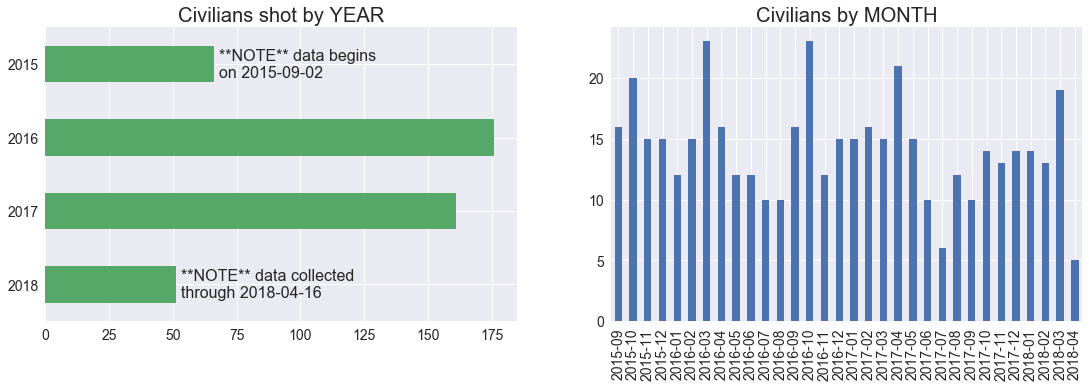

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(16, 6)

ax = axes[0]
ax.set_title('Civilians shot by YEAR')
s_year = shootings['date_incident'].apply(lambda dt: '%d' % (dt.year))
s_year.value_counts().sort_index()[::-1].plot(kind='barh', ax=ax, color=SNS_GREEN)
ax.text(68, 3, '**NOTE** data begins\non ' + first_shooting, verticalalignment='center', fontsize=16)
ax.text(53, 0, '**NOTE** data collected\nthrough ' + last_shooting, verticalalignment='center', fontsize=16)

ax = axes[1]
ax.set_title('Civilians by MONTH')
shootings['date_incident'].apply(lambda dt: '%d-%02d' % (dt.year, dt.month)).value_counts().sort_index().plot(kind='bar', ax=ax)
plt.subplots_adjust(left=.05, right=.95, bottom=0.2)
saveplot(fig, 'year_month')

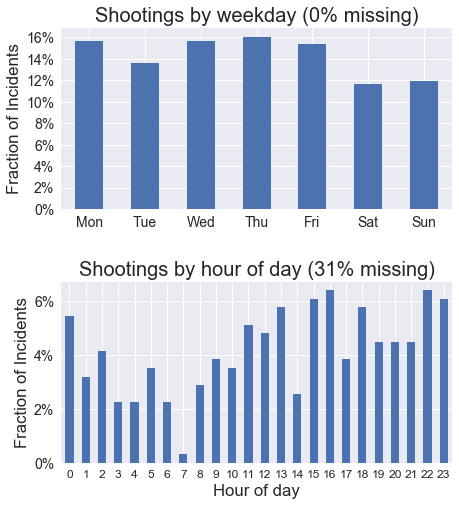

In [7]:
fig, axes = plt.subplots(2, 1)

ax = axes[0]
fig.set_size_inches(7, 8)
counts = shootings['date_incident'].apply(lambda dt: dt.weekday()).value_counts(True).sort_index()
ax.set_yticks(np.arange(0, 0.21, 0.02))
ax.set_ylabel('Fraction of Incidents')
eda.percentify_y(ax, decimals=0)
counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
counts.plot(kind='bar', ax=ax)
ax.set_title('Shootings by weekday (%.0f%% missing)' % (shootings.date_incident.isnull().mean() * 100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

ax = axes[1]
shootings['hour'] = shootings.time_incident.dropna().apply(lambda t: int(t.split(':')[0])).astype(int)
shootings.hour.value_counts(True).sort_index().plot(kind='bar', ax=ax)
ax.set_xlabel('Hour of day')
ax.set_ylabel('Fraction of Incidents')
eda.percentify_y(ax, decimals=0)
ax.set_title('Shootings by hour of day (%.0f%% missing)' % (shootings.time_incident.isnull().mean() * 100))
ax.set_xticklabels([int(t) for t in ax.get_xticks()], fontsize=12, rotation=0)


plt.subplots_adjust(hspace=.4)
saveplot(fig, 'weekday_hour')

## WHERE do shootings happen?

In [8]:
datasets = dw.load_dataset(DTW_PROJECT_KEY, force_update=True)
county_seats = datasets.dataframes['texas_counties'].set_index('county')['seat']
county_seats.head()

county
ANDERSON      PALESTINE
ANDREWS         ANDREWS
ANGELINA         LUFKIN
ARANSAS        ROCKPORT
ARCHER      ARCHER CITY
Name: seat, dtype: object

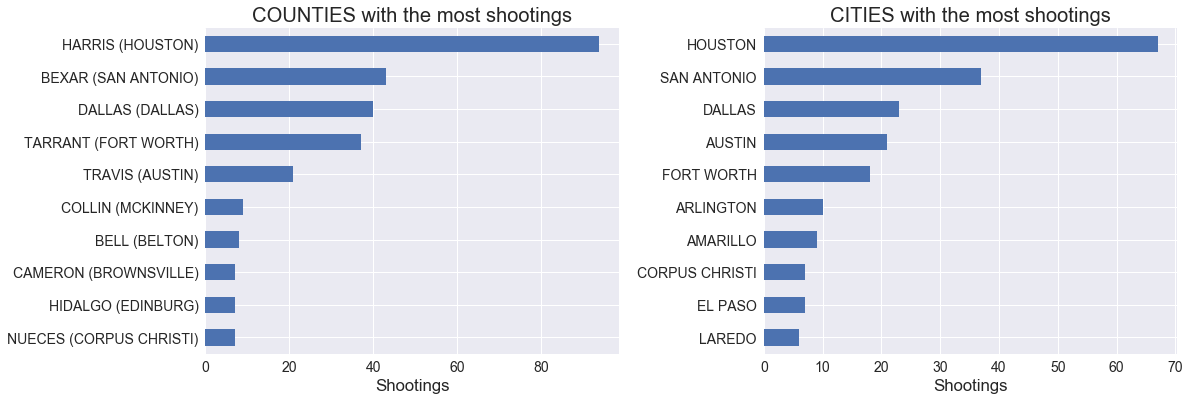

In [9]:
top_counties = shootings.incident_county.value_counts().head(10)
top_counties.index = pd.Series(top_counties.index).apply(
    lambda county: "%s (%s)" % (county, county_seats[county]))

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18, 6)

ax = axes[0]
top_counties[::-1].plot(kind='barh', ax=ax)
ax.set_title('COUNTIES with the most shootings')
ax.set_xlabel("Shootings")

ax = axes[1]
shootings['incident_city'].value_counts()[:10][::-1].plot(kind='barh', ax=ax)
ax.set_title("CITIES with the most shootings")
ax.set_xlabel("Shootings")

plt.subplots_adjust(left=0.2, wspace=.35, right=.95)
saveplot(fig, 'shootings_by_location')

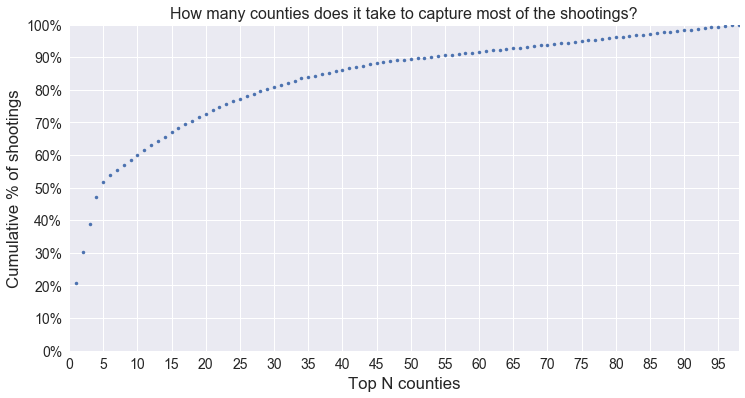

In [10]:
fig, ax = plt.subplots(1)
s = shootings['incident_county'].value_counts(True, ascending=False)
s.index = range(1, len(s) + 1)
s.cumsum().plot(ax=ax, marker='.', linewidth=0)
ax.set_ylim((0, 1))
ax.set_yticks(np.arange(0, 1.01, .1))
ax.set_yticklabels(['%d%%' % i for i in range(0, 101, 10)])
ax.set_xticks(range(0, 100, 5))
ax.legend_ = None
ax.set_title('How many counties does it take to capture most of the shootings?', fontsize=16)
ax.set_xlabel('Top N counties')
ax.set_ylabel('Cumulative % of shootings')
fig.set_size_inches(12, 6)
saveplot(fig, 'cumulative_shootings_by_county')

## What civilians get shot?

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


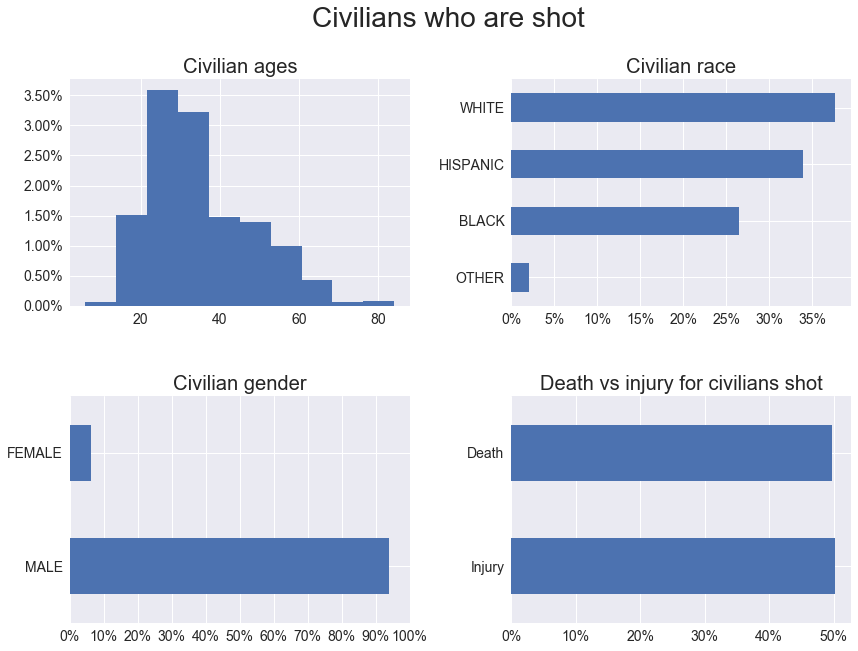

In [11]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Civilians who are shot', fontsize=28)

ax = axes[0][0]
shootings.civilian_age.hist(ax=ax, normed=True)
ax.set_title('Civilian ages')
eda.percentify_y(ax)

ax = axes[0][1]
shootings.civilian_race.value_counts(True)[::-1].plot(kind='barh', ax=ax)
ax.set_title('Civilian race')
eda.percentify_x(ax, decimals=0)

ax = axes[1][0]
shootings.civilian_gender.value_counts(True).plot(kind='barh', ax=ax)
ax.set_xticks(np.arange(0, 1.01, .1))
ax.set_title('Civilian gender')
eda.percentify_x(ax)

ax = axes[1][1]
shootings['civilian_died'].value_counts(True).plot(kind='barh', ax=ax)
ax.set_yticklabels([ 'Death' if t.get_text() == 'True' else 'Injury' for t in ax.get_yticklabels()])
eda.percentify_x(ax)
ax.set_title('Death vs injury for civilians shot')

plt.subplots_adjust(hspace=0.4, wspace=.3)
saveplot(fig, 'civilian_summary')

## What officers are involved?

/Users/everettwetchler/.virtualenvs/tji-analysis/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


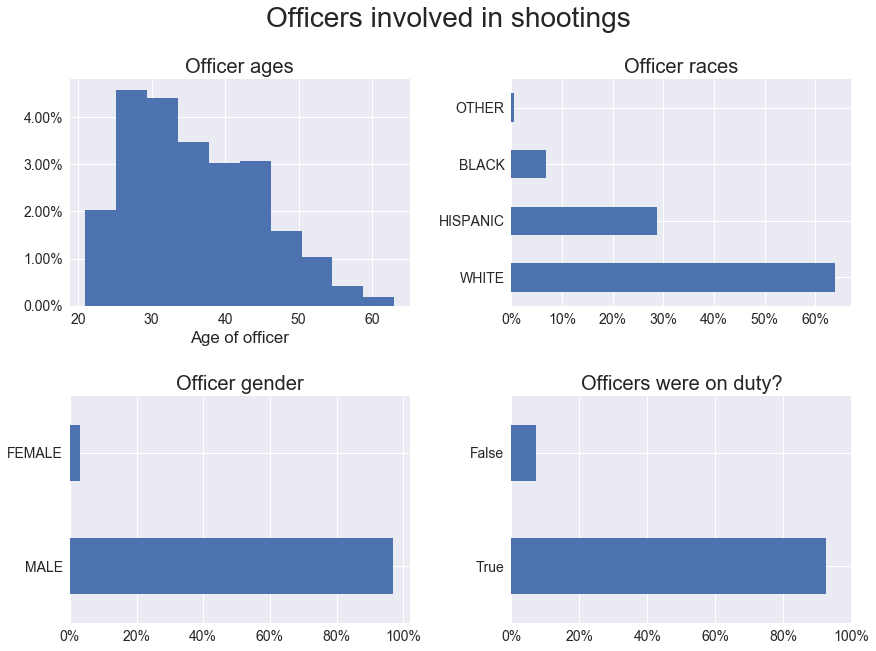

In [12]:
all_officer_ages = []
all_officer_races = []
all_officer_genders = []
for i in range(1, 11):
    all_officer_ages.extend(list(shootings['officer_age_%d' % i].dropna()))
    all_officer_races.extend(list(shootings['officer_race_%d' % i].dropna()))
    all_officer_genders.extend(list(shootings['officer_gender_%d' % i].dropna()))

all_officer_ages = pd.Series(all_officer_ages)
all_officer_races = pd.Series(all_officer_races)
all_officer_genders = pd.Series(all_officer_genders)
N_OFFICERS = shootings['num_officers_recorded'].sum()

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(14, 10)
fig.suptitle('Officers involved in shootings', fontsize=28)

ax = axes[0][0]
all_officer_ages.hist(ax=ax, normed=True)
ax.set_title('Officer ages')
ax.set_xlabel('Age of officer')
eda.percentify_y(ax)

ax = axes[0][1]
all_officer_races.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Officer races')
eda.percentify_x(ax)

ax = axes[1][0]
all_officer_genders.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Officer gender')
eda.percentify_x(ax)

ax = axes[1][1]
shootings.on_duty.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Officers were on duty?')
ax.set_xlim((0, 1))
eda.percentify_x(ax)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
saveplot(fig, 'officer_summary')

## Miscellaneous

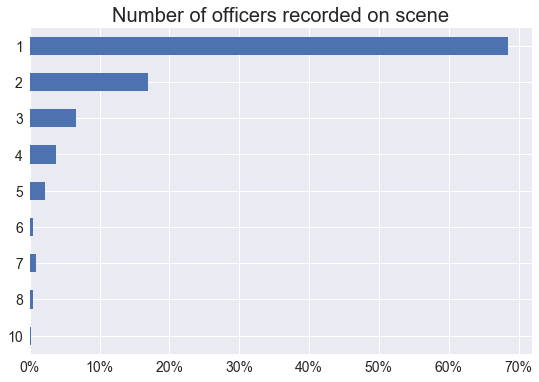

In [13]:
fig, ax = plt.subplots(1)
shootings.num_officers_recorded.value_counts(True).sort_index(ascending=False).plot(kind='barh', ax=ax)
ax.set_title('Number of officers recorded on scene')
ax.set_xticks(np.arange(0, 0.71, 0.1))
eda.percentify_x(ax)

In [14]:
race_pairs = []
for i in range(1, 11):
    for civilian, officer in zip(shootings['civilian_race'], shootings['officer_race_%d' % i]):
        if pd.notnull(officer):
            race_pairs.append([civilian, officer])

tmp = pd.DataFrame(race_pairs, columns=['civilian', 'officer'])
tab = pd.crosstab(tmp['civilian'], tmp['officer'])
race_order = ['WHITE', 'BLACK', 'HISPANIC', 'OTHER']
tab.loc[race_order, race_order]

officer,WHITE,BLACK,HISPANIC,OTHER
civilian,,,,
WHITE,191,11,65,1
BLACK,149,26,42,2
HISPANIC,118,12,102,1
OTHER,14,1,4,0


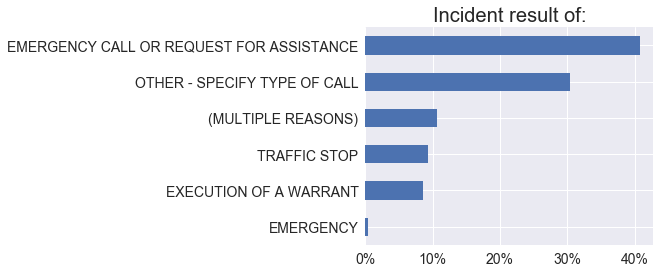

In [15]:
fig, ax = plt.subplots(1)
shootings.incident_result_of.apply(lambda res: '(MULTIPLE REASONS)' if ',' in res else res).value_counts(True)[::-1].plot(kind='barh', ax=ax)
fig.set_size_inches(10,4)
ax.set_title('Incident result of:')
eda.percentify_x(ax, decimals=0)
plt.subplots_adjust(left=0.5)
saveplot(fig, 'incident_result_of')

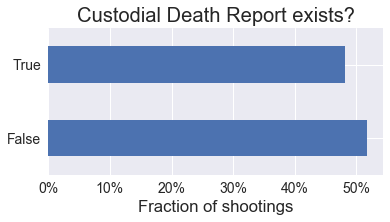

In [16]:
fig, ax = plt.subplots(1)
shootings.custodial_death_report.value_counts(True).plot(kind='barh', ax=ax)
ax.set_title('Custodial Death Report exists?')
ax.set_xlabel('Fraction of shootings')
fig.set_size_inches(6, 3)
eda.percentify_x(ax)
plt.subplots_adjust(bottom=0.2)
saveplot(fig, 'cdr_exists')

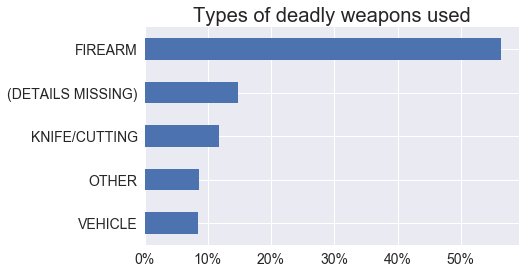

In [17]:
fig, ax = plt.subplots(1)
weapons = shootings.deadly_weapon_category[shootings.deadly_weapon_category != '(details missing)']
weapons.value_counts(True, ascending=True).plot(kind='barh', ax=ax)
ax.set_title('Types of deadly weapons used')
eda.percentify_x(ax)
fig.set_size_inches(8, 4)
plt.subplots_adjust(left=0.25)
saveplot(fig, 'deadly_weapon_types')

219 CDR narratives published, 45 LEA narratives published


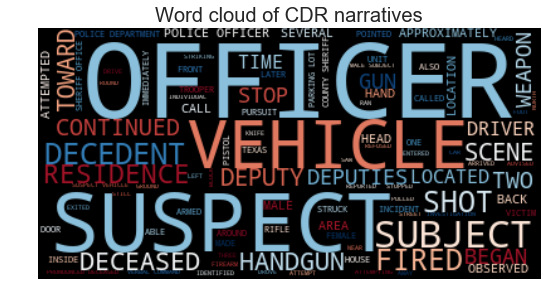

In [18]:
cdr = []
lea = []
for x in shootings['cdr_narrative'].values:
    if pd.notnull(x):
        cdr.append(x)
for x in shootings['lea_narrative_published'].values:
    if pd.notnull(x):
        lea.append(x)

print("%d CDR narratives published, %d LEA narratives published" % (len(cdr), len(lea)))

all_cdr = []
for x in cdr:
    all_cdr.extend(x.split())

remove_words = []#set(['suspect', 'officer', 'subject', 'police'])
text = []
for w in all_cdr:
    invalid = False
    for rem in remove_words:
        if rem in w.lower():
            invalid = True
            break
    if not invalid:
        text.append(w)
text = ' '.join(text)

cloud = WordCloud(background_color="black", max_words=100, colormap='RdBu').generate(text)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.gca().set_title('Word cloud of CDR narratives')
saveplot(plt.gcf(), 'cdr_narrative_wordcloud')